# Evaluate Simple Frog

histexample.output


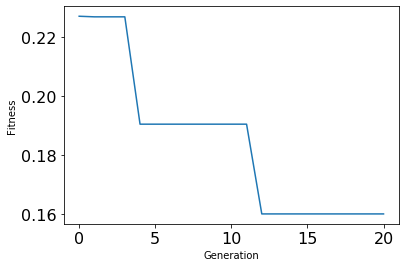

In [103]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from pathlib import Path

prefix = 34
folder = 'Image_Data/Output/'
folder = '.'

def evaluate_run(prefix = 0, folder='./'):
    p = Path(folder)
    filefilter = f'{prefix}_*.output'
    filefilter = 'histexample.output'
    print(filefilter)
    filenames = list(p.glob(filefilter))

    assert(len(filenames) > 0)

    fitness = []
    pop = []
    dist = []
    for filename in filenames:
        fid  = open(filename, 'r')
        lines = fid.readlines() 
        for line in lines:
            if 'BEST' in line:
                fitness.append(eval(line.split('-')[1]))
                pop.append(eval(line.split(' - ')[2]))
            if 'HIST' in line:
                dist.append(eval(line.split('-')[1]))

    fitness = np.array(fitness)
    fitness = list(fitness[:,0])
    fitness.sort(reverse=True)
    plt.plot(fitness)
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.savefig(f'{filename}.png')
    return fitness, pop, dist

fitness_list, pop, dist = evaluate_run(prefix, folder=folder)

In [104]:
for threshold in np.arange(1,0,-0.1):
    print(np.sum(np.array(fitness_list) > threshold))

0
0
0
0
0
0
0
0
4
21


In [105]:
import imageio
from see import Segmentors
from see import JupyterGUI


#print(imagefiles[prefix])
# img = imageio.imread(imagefiles[prefix])
# gmask = imageio.imread(maskfiles[prefix])

img = imageio.imread('Image_data/CO-SKEL_v1.1/images/frog/0007.jpg')
gmask = imageio.imread('Image_data/CO-SKEL_v1.1/GT_masks/frog/0007.png')

['CT', 9233, 0.689, 2125, 0.3, 2602, 7368, 10, 0.17, 1970, 3766, 3, 2, 0.001, 0.39, (2, 1), 2.5, 'checkerboard', 'checkerboard', 8, 6494, 42, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'fitness=0.15998838559814169')

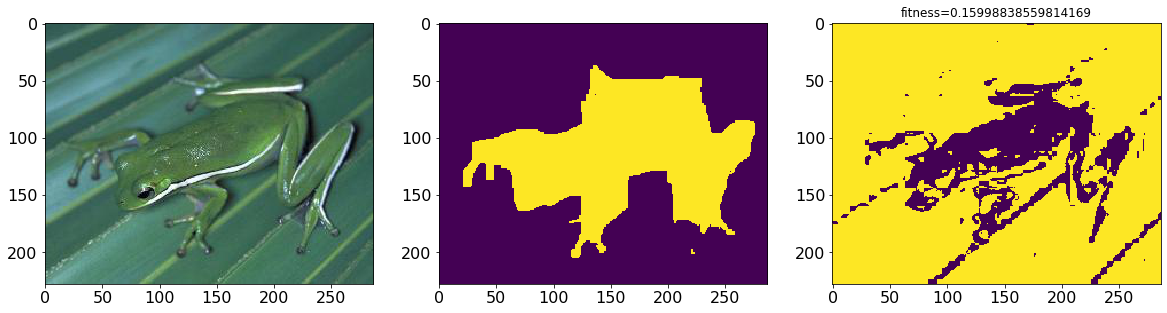

In [106]:
params = pop[-1]
print(params)
seg = Segmentors.algoFromParams(params)
mask2 = seg.evaluate(img)
fitness,_,_ = Segmentors.FitnessFunction(mask2,gmask)
JupyterGUI.showthree(img, gmask, mask2)
plt.title(f"fitness={fitness}")

In [107]:
test = []
keys = None
for d in dist:
    test.append(list(d.values()));
    keys = list(d.keys())
    
array = np.array(test)

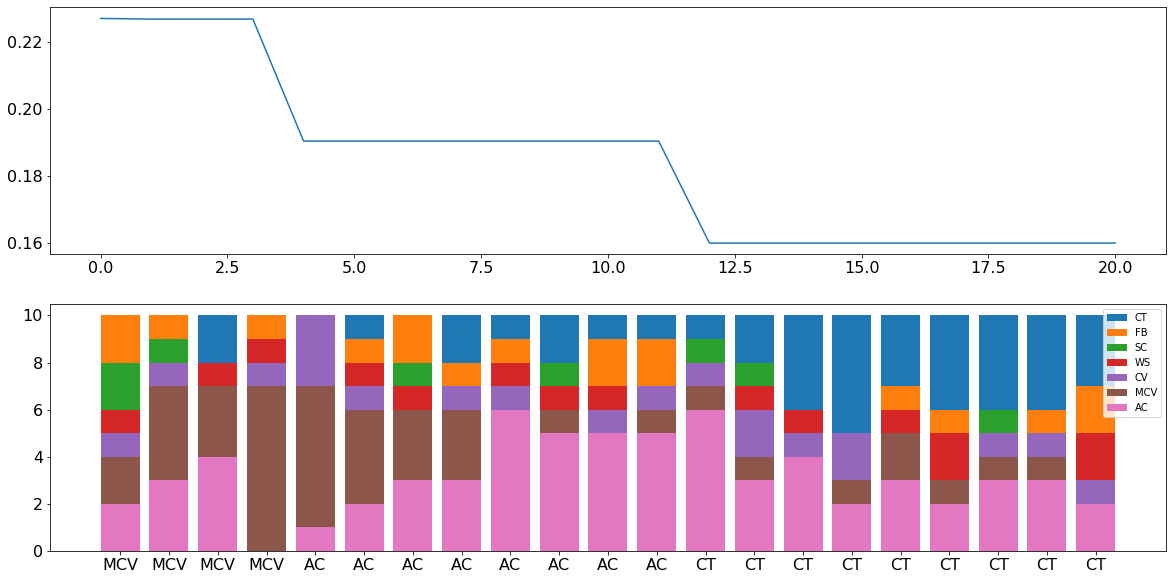

In [108]:
import copy

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(fitness_list);
plt.subplot(212)
ind = list(range(len(fitness_list)))
shrinkray = array
index = 0
winners = []
for k in keys:
    plt.bar(ind, np.sum(shrinkray.T,axis=0), label=k);
    shrinkray = shrinkray[:,1:]

plt.legend()

winners = list(np.array(pop)[:,0])
plt.xticks(ind, winners);


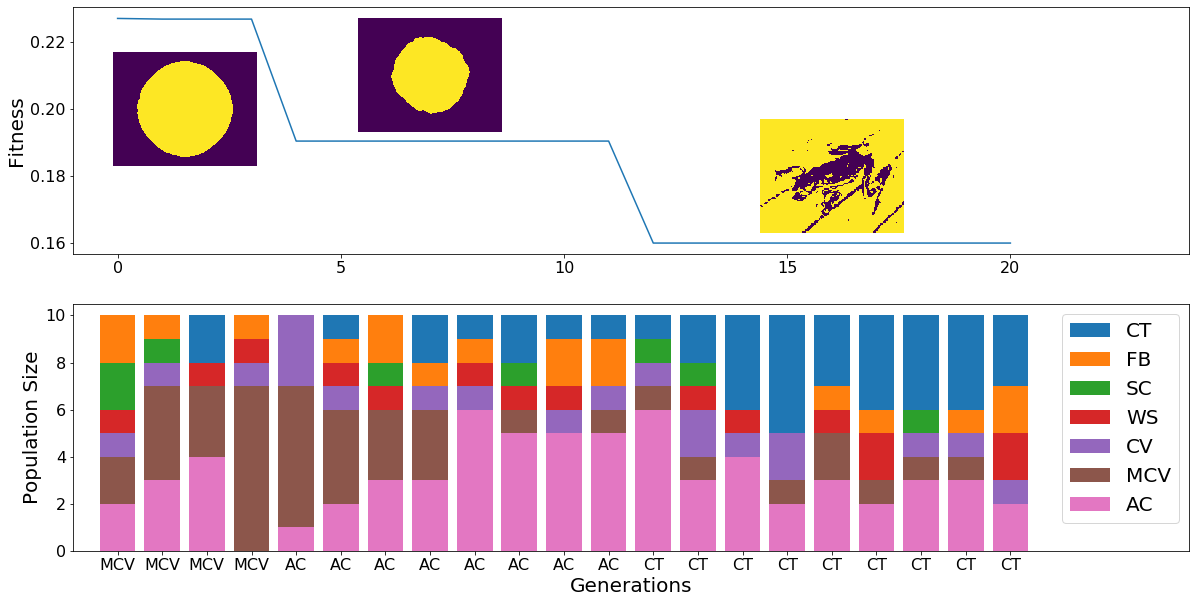

In [109]:
import copy
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import rc

plt.figure(figsize=(20,10))
fig = plt.subplot(211)
fig.plot(fitness_list);

rc('xtick', labelsize=16) 
rc('ytick', labelsize=16) 
ax = plt.gca()

# Annotate the 2nd position with another image (a Grace Hopper portrait)
arr_img = mask0
imagebox = OffsetImage(arr_img, zoom=0.5)#, cmap='bwr')
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, [1.5,0.2],
                    xybox=(0,0),
                    xycoords='data',
                    boxcoords="offset points",
                    frameon=False
                    )
ax.add_artist(ab)


arr_img = mask1
imagebox = OffsetImage(arr_img, zoom=0.5)#, cmap='bwr')
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, [7,0.21],
                    xybox=(0,0),
                    xycoords='data',
                    boxcoords="offset points",
                    frameon=False
                    )
ax.add_artist(ab)

arr_img = mask2
imagebox = OffsetImage(arr_img, zoom=0.5)#, cmap='bwr')
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, [16,0.18],
                    xybox=(0,0),
                    xycoords='data',
                    boxcoords="offset points",
                    frameon=False
                    )
ax.add_artist(ab)
plt.gca().set_xlim(-1, len(pop)+3)

plt.ylabel('Fitness', fontsize=20);



plt.subplot(212)
ind = list(range(len(fitness_list)))
shrinkray = array
index = 0
winners = []
for k in keys:
    plt.bar(ind, np.sum(shrinkray.T,axis=0), label=k);
    shrinkray = shrinkray[:,1:]

plt.legend(fontsize=20)

winners = list(np.array(pop)[:,0])
plt.xticks(ind, winners, fontsize=16);
plt.gca().set_xlim(-1, len(pop)+3)
rc('xtick', labelsize=16) 
rc('ytick', labelsize=16) 
plt.xlabel('Generations', fontsize=20);
plt.ylabel('Population Size', fontsize=20);